In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class MLPNoBackprop:
    
    def __init__(self, 
                 layer_sizes,
                 hidden_activation='sigmoid',
                 output_activation='linear'):
        """
        layer_sizes: a list specifying the number of neurons in each layer, e.g. [1, 6, 1]:
            - 1: number of neurons in the input layer (input dimension),
            - 6: number of neurons in the hidden layer,
            - 1: number of neurons in the output layer.
        
        hidden_activation: Activation function for hidden layers ('sigmoid' or 'linear').
        output_activation: Activation function for the output layer ('sigmoid' or 'linear').
        """
        
        activation_functions = {
            'sigmoid' : sigmoid,
            'linear' : linear
        }
        
        self.layer_sizes = layer_sizes
        self.hidden_activation = activation_functions.get(hidden_activation)
        self.output_activation = activation_functions.get(output_activation)
        
        self.weights = []
        self.biases = []
        
        for i in range(len(layer_sizes) - 1):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i+1]))
            self.biases.append(np.zeros(layer_sizes[i+1], ))
        
        

    def forward(self, X):
        """
        Signal propagation through the network.
        
        X is the input matrix (number of samples × input dimension) or a one-dimensional vector.
        
        Returns a list of activations of each layer and the final output of the network.
        """
        
        activations = [X]
        
        # hidden layers
        for layer_idx in range(len(self.layer_sizes) - 2):
            activations.append(
                self.hidden_activation(np.dot(activations[layer_idx], self.weights[layer_idx]) + self.biases[layer_idx])
            )
        
        # output layers
        activations.append(
            self.output_activation(np.dot(activations[layer_idx + 1], self.weights[layer_idx + 1]) + self.biases[layer_idx + 1])
        )
        
        return activations


    def predict(self, X):
        """
        Returns the network output, i.e., the final activation.
        """
        return np.array(self.forward(X)[-1]).reshape(-1,)
    

    def set_weights_and_biases(self, layer_idx, W, b):
        """
        Allows manually setting the weights and biases for a layer with the given layer_idx.  
        
        layer_idx specifies the layer number (0 = first connection, 1 = second, etc.).  
        W is the new weight matrix with dimensions [layer_sizes[layer_idx], layer_sizes[layer_idx+1]].  
        b is the new bias vector with dimensions [layer_sizes[layer_idx+1], ].  
        """
        self.weights[layer_idx] = W
        self.biases[layer_idx] = b


    def mse(self, y_true, y_pred):
        """
        Mean Squared Error (MSE).
        """
        return np.mean((y_true - y_pred) ** 2)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def linear(x):
    return x


# **Square-simple dataset**

In [3]:
import pandas as pd 
square_simple_test = pd.read_csv('./data/regression/square-simple-test.csv')
square_simple_test.drop(square_simple_test.columns[0], axis = 1, inplace = True)
square_simple_test.head()

,x,y
0,-0.980437,-43.486918
1,-1.219074,3.752808
2,0.124243,-128.610721
3,1.227789,5.671828
4,1.067348,-27.469169


In [4]:
X = square_simple_test.iloc[:, 0:(len(square_simple_test.iloc[1]) - 1)]
X

,x
0,-0.980437
1,-1.219074
2,0.124243
3,1.227789
4,1.067348
...,...
95,1.315377
96,-1.196968
97,1.544766
98,0.441051


In [5]:
y = np.array(square_simple_test.iloc[:,-1])
y

array([ -43.4869178 ,    3.7528081 , -128.61072132,    5.67182845,
        -27.46916942,   36.53905322,  -56.38035958,  163.71667642,
       -109.92253645,  -43.87280887,  -36.76289151, -117.96377078,
          5.24004298, -128.71571315,  -61.08193105,    2.94504249,
        -66.12375418,   45.94659944,  -35.44343445,  -60.21294992,
        152.56039396, -113.61118977,  -96.92892366,  -70.87526302,
       -117.45634919,  -61.6352831 , -129.40068949, -116.2889997 ,
        -22.4051127 ,  -65.18253908,  -30.00706095, -129.69254744,
       -129.76750355, -127.04872533, -129.99872127,  -35.94423603,
         42.9839369 , -100.44370111,   17.54573642,   -2.20515614,
        134.15409845,   77.7183315 , -116.26978495,  -98.3955533 ,
        -21.50896413,  -17.95638098,  133.98965463,   16.57471183,
        -33.89758147, -108.13660414,  -69.68552784,    9.36397857,
        -30.97383527,  -31.11726539,    9.97642442,   25.40471118,
       -118.23465865,  -19.72530026,  -20.87078975,  -28.95151

### One hidden layer, 5 neurons

MSE: 2.6496676032300615


<function matplotlib.pyplot.show(close=None, block=None)>

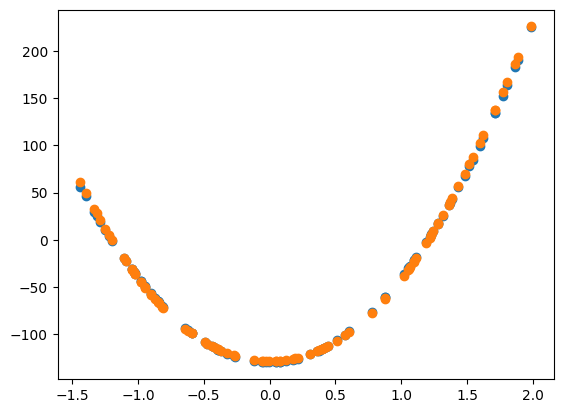

In [6]:
NN = MLPNoBackprop([1, 5, 1])

W0 = np.array([[1.50, -1.50, 2.30, 2.30, 2.30]])
b0 = np.array([[-3, -3, 1, 1, 1]])
NN.set_weights_and_biases(0, W0, b0)

W1 = np.array([[880], [900], [1], [1], [1]])
b1 = np.array([-215.20])
NN.set_weights_and_biases(1, W1, b1)

y_pred = NN.predict(X)
print(f'MSE: {NN.mse(y_true = y, y_pred = y_pred)}')
plt.plot(X, y, 'o')
plt.plot(X, y_pred, 'o')
plt.show


# **Steps-large dataset**

In [7]:
steps_large_test = pd.read_csv('./data/regression/steps-large-test.csv')
steps_large_test.drop(steps_large_test.columns[0], axis = 1, inplace = True)
steps_large_test.head()

,x,y
0,1.706990,160
1,-0.604580,-80
2,-0.674405,-80
3,1.341562,80
4,-1.427434,-80


In [8]:
X = steps_large_test.iloc[:, 0:(len(steps_large_test.iloc[1]) - 1)]
X

,x
0,1.706990
1,-0.604580
2,-0.674405
3,1.341562
4,-1.427434
...,...
995,-1.374447
996,-0.764941
997,-0.304863
998,1.681272


In [9]:
y = np.array(steps_large_test['y'])
y

array([160, -80, -80,  80, -80,  80,   0, -80, -80, -80, -80, -80,  80,
       160,   0,   0, -80,  80, 160, -80, 160,   0, -80, 160, 160, -80,
       -80,  80,   0,  80, 160, -80,  80,  80,   0,  80, -80,   0,  80,
       160, -80,  80, 160,   0, 160,   0,  80, -80, 160,  80, -80,   0,
       160,   0, 160,  80, 160,   0,  80, -80, -80,  80,   0,   0,   0,
       -80, 160,   0, -80, -80,   0,  80,  80,  80, -80,   0,   0,   0,
       160,  80,   0, -80, 160,   0,   0, -80,  80,   0,  80,  80, 160,
        80,   0,   0, -80,  80, -80, -80,  80, 160,   0, -80, -80,  80,
        80, -80,  80, 160, -80, -80, -80,  80, -80,   0, 160,   0,  80,
        80,   0,  80,  80, -80,   0,  80, -80,  80,  80, -80,  80, -80,
       -80,   0, 160,  80,   0,   0, -80, -80, 160, -80,   0, -80, -80,
         0,   0,   0,  80,  80, 160, -80,  80, -80,   0,  80, -80,  80,
        80,   0, -80,  80,  80,   0,   0, -80, -80, -80,  80, 160,   0,
       -80,   0, -80, 160, -80,   0, 160,  80,   0,   0,   0, 16

### One hidden layer, 5 neurons

MSE: 4.0158697060099655


C:\Users\flang\AppData\Local\Temp\ipykernel_9548\1862931590.py:87: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


<function matplotlib.pyplot.show(close=None, block=None)>

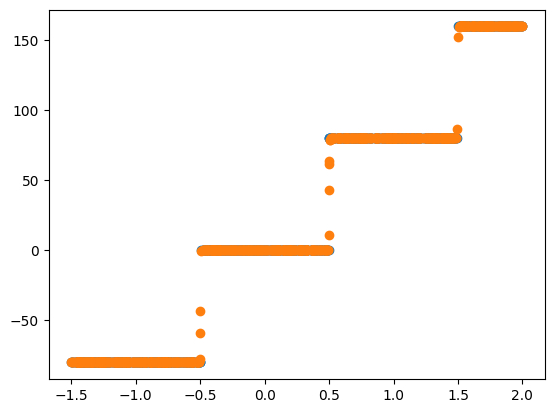

In [10]:
NN = MLPNoBackprop([1, 5, 1])

W0 = np.array([[600, 600, 600, 0, 0]])
b0 = np.array([300, -300, -900, 0, 0])
NN.set_weights_and_biases(0, W0, b0)

W1 = np.array([[80], [80], [80], [0], [0]])
b1 = np.array([-80])
NN.set_weights_and_biases(1, W1, b1)

y_pred = NN.predict(X)
print(f'MSE: {NN.mse(y_true = y, y_pred = y_pred)}')
plt.plot(X, y, 'o')
plt.plot(X, y_pred, 'o')
plt.show

### One hidden layer, 10 neurons

MSE: 4.0158697060099655


C:\Users\flang\AppData\Local\Temp\ipykernel_9548\1862931590.py:87: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


<function matplotlib.pyplot.show(close=None, block=None)>

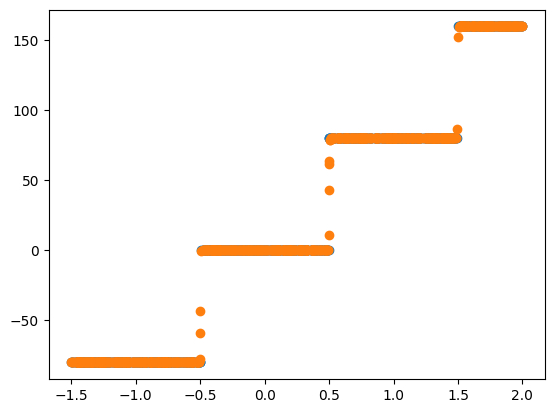

In [11]:
NN = MLPNoBackprop([1, 10, 1])

W0 = np.array([[600, 600, 600, 0, 0, 0, 0, 0, 0, 0]])
b0 = np.array([300, -300, -900, 0, 0, 0, 0, 0, 0, 0])
NN.set_weights_and_biases(0, W0, b0)

W1 = np.array([[80], [80], [80], [0], [0], [0], [0], [0], [0], [0]])
b1 = np.array([-80])
NN.set_weights_and_biases(1, W1, b1)

y_pred = NN.predict(X)
print(f'MSE: {NN.mse(y_true = y, y_pred = y_pred)}')
plt.plot(X, y, 'o')
plt.plot(X, y_pred, 'o')
plt.show


### Two hidden layers, 5 neurons each

MSE: 6.0807290547148485


C:\Users\flang\AppData\Local\Temp\ipykernel_9548\1862931590.py:87: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


<function matplotlib.pyplot.show(close=None, block=None)>

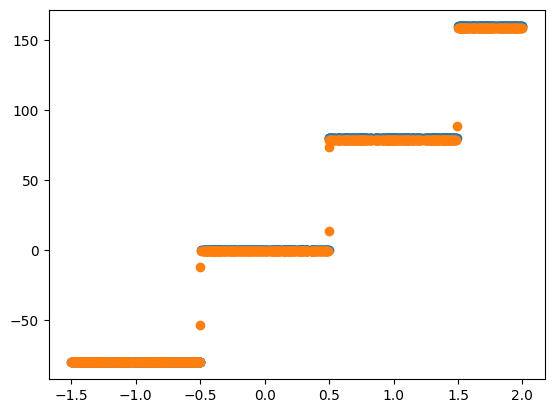

In [12]:
NN = MLPNoBackprop([1, 5, 5, 1])

W0 = np.array([[1200, 900, 800, 0, 0]])
b0 = np.array([600, -450, -1200, 0, 0])
NN.set_weights_and_biases(0, W0, b0)

W1 = np.array([[6, 0, 0, 0, 0], [0, 6, 0, 0, 0], [0, 0, 6, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]])
b1 = np.array([0, 0, 0, 0, 0])
NN.set_weights_and_biases(1, W1, b1)

W2 = np.array([[160], [160], [160], [0], [0]])
b2 = np.array([-320])
NN.set_weights_and_biases(2, W2, b2)

y_pred = NN.predict(X)
print(f'MSE: {NN.mse(y_true = y, y_pred = y_pred)}')
plt.plot(X, y, 'o')
plt.plot(X, y_pred, 'o')
plt.show